In [1]:
import pandas as pd
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt

import matplotlib.dates as mdates

from numpy import diag, allclose, corrcoef, array, eye, ones, sqrt, zeros

from numpy.linalg import eig, matrix_rank, inv, cholesky, qr, norm, inv, svd

In [2]:
# import data 

## SP futures
es = pd.read_csv('data/es.csv')

## VIX futures
vix1 = pd.read_csv('data/vix1.csv')
vix2 = pd.read_csv('data/vix2.csv')
vix3 = pd.read_csv('data/vix3.csv')

## SP volatility
month1_vol = pd.read_csv('data/1month_vol.csv')
month2_vol = pd.read_csv('data/2month_vol.csv')
month3_vol = pd.read_csv('data/3month_vol.csv')

## SP skew
month1_skew = pd.read_csv('data/1month_skew.csv')
month2_skew = pd.read_csv('data/2month_skew.csv')
month3_skew = pd.read_csv('data/3month_skew.csv')

In [3]:
# clean 

## set date as index
es.set_index('Date', inplace=True)

vix1.set_index('Date', inplace=True)
vix2.set_index('Date', inplace=True)
vix3.set_index('Date', inplace=True)

month1_vol.set_index('Date', inplace=True)
month2_vol.set_index('Date', inplace=True)
month3_vol.set_index('Date', inplace=True)

month1_skew.set_index('Date', inplace=True)
month2_skew.set_index('Date', inplace=True)
month3_skew.set_index('Date', inplace=True)

## drop bad data
vix2 = vix2.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'], axis=1)
vix3 = vix3.drop(['Unnamed: 6', 'Unnamed: 7'], axis=1)

## reverse time series
es = es.iloc[::-1]

vix1 = vix1.iloc[::-1]
vix2 = vix2.iloc[::-1]
vix3 = vix3.iloc[::-1]

month1_vol = month1_vol.iloc[::-1]
month2_vol = month2_vol.iloc[::-1]
month3_vol = month2_vol.iloc[::-1]

month1_skew = month1_skew.iloc[::-1]
month2_skew = month2_skew.iloc[::-1]
month3_skew = month3_skew.iloc[::-1]

In [4]:
# Data 1
df_es_vix1 = es.merge(vix1, left_index=True, right_index=True)
df_es_vix1 = df_es_vix1.drop(['ES_PX_LAST', 'ES_PX_VOLUME', '1_Future', '1_PX_LAST', '1_PX_VOLUME', 
                              '1_DAYS_UNTIL_EXP'], axis=1)
df_es_vix1.head()

,ES_DAILY_RETURN,1_DAILY_RETURN
Date,,
1/2/08,-0.012693,0.032007
1/3/08,0.000171,-0.018441
1/4/08,-0.024507,0.053800
1/7/08,-0.001054,-0.022690
1/8/08,-0.017235,0.058872


<IPython.core.display.Javascript object>


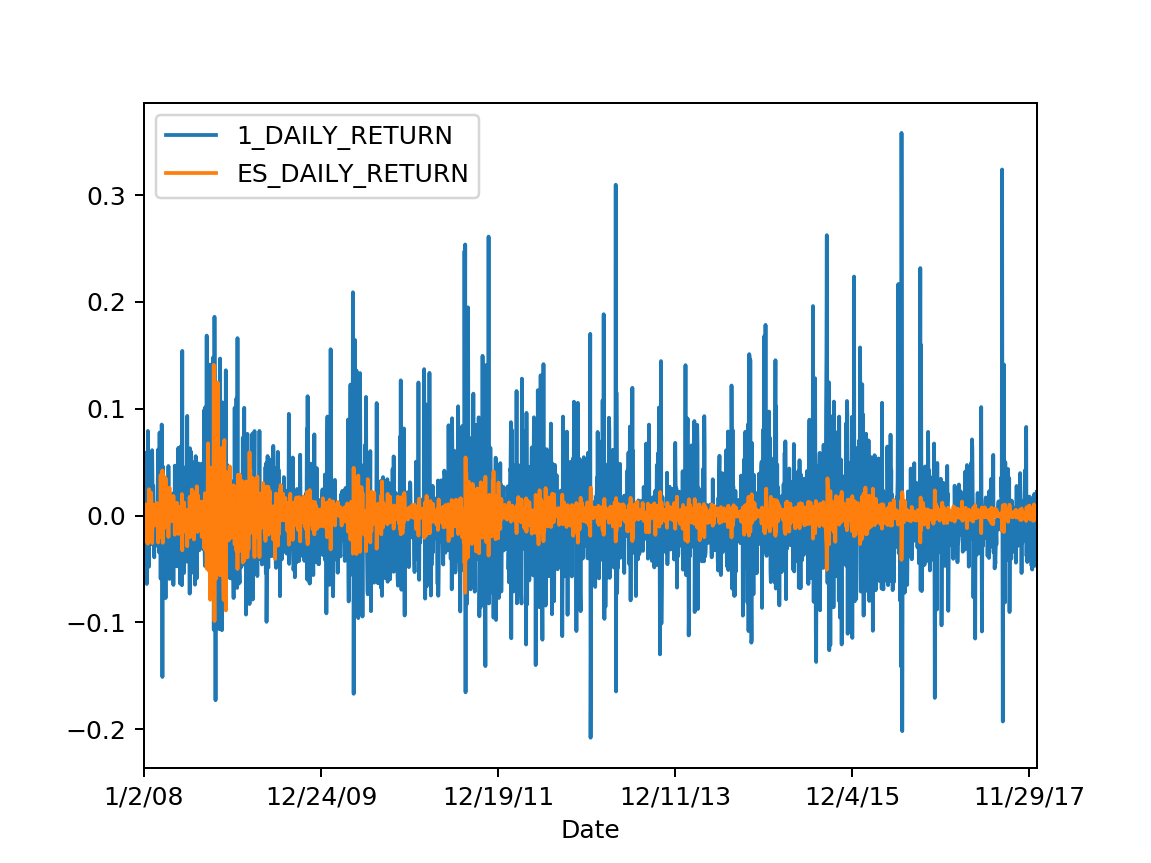

In [6]:
# SP 500 futures vers 1 month vix daily return
df_plot = df_es_vix1[['1_DAILY_RETURN', 'ES_DAILY_RETURN']]
df_plot.plot()

In [8]:
array = df_es_vix1.to_numpy()

In [ ]:
# Analysis of SP 500 future daily return versus 1 month vix future

In [9]:
# Linear regression using least squares
A = array[:,0].reshape(-1,1)
b = array[:,1].reshape(-1,1)

In [10]:
x_hat = inv(A.T @ A) @ A.T @ b
p = A @ x_hat
e = p - b
print(x_hat)
print()
print(p)

[[-2.79791763]]

[[ 0.03551258]
 [-0.00047959]
 [ 0.06856936]
 ...
 [ 0.00156192]
 [-0.00026049]
 [ 0.0101572 ]]


In [11]:
r2 = 1 - sum((A - A.mean())**2) / sum(e**2)
r2

array([0.85406674])

In [36]:
# Regression using svd
U, s, V = svd(A, full_matrices=True)

In [37]:
Ur = U[:,:1]
p = Ur @ Ur.T @ b
e = b - p

print(p)

[[ 0.03551258]
 [-0.00047959]
 [ 0.06856936]
 ...
 [ 0.00156192]
 [-0.00026049]
 [ 0.0101572 ]]


In [12]:
r2 = 1 - sum((A - A.mean())**2) / sum(e**2)
r2

array([0.85406674])

In [13]:
# Predict

In [14]:
x_hat = inv(A[:2000].T @ A[:2000]) @ A[:2000].T @ b[:2000]
p = A[:2000] @ x_hat
e = b[:2000] - p
print(x_hat)
print()
print(p)

[[-2.62507698]]

[[ 0.0333188 ]
 [-0.00044996]
 [ 0.06433351]
 ...
 [-0.02555971]
 [ 0.02312568]
 [ 0.03814969]]


In [41]:
r2 = 1 - sum((A[:2000] - A[:2000].mean())**2) / sum(e**2)
r2

array([0.8184918])

In [42]:
# predict
p = A[-522:] @ x_hat
e = b[-522:] - p

print(p[:5])

[[-0.0476705 ]
 [ 0.0094269 ]
 [ 0.02806726]
 [ 0.02135764]
 [-0.00932018]]


In [43]:
r2 = 1 - sum((A[-522:] - A[-522].mean())**2) / sum(e**2)
r2

array([0.74014075])

In [15]:
# Predict using svd
U, s, V = svd(A[:2000], full_matrices=True)
Ur = U[:,:1]
p = Ur @ Ur.T @ b[:2000]
e = b[:2000] - p
q_x_hat = Ur.T @ b[:2000]

print(q_x_hat)
print()
print(p)

[[-1.66659397]]

[[ 0.0333188 ]
 [-0.00044996]
 [ 0.06433351]
 ...
 [-0.02555971]
 [ 0.02312568]
 [ 0.03814969]]


In [16]:
r2 = 1 - sum((A[:2000] - A[:2000].mean())**2) / sum(e**2)
r2

array([0.8184918])

In [17]:
U, s, V = svd(A[-522:], full_matrices=True)
U2, s2, V2 = svd(b)
Ur = U[:,:1]
p = Ur @ q_x_hat
e = b[-522:] - p

print(p[:5])

[[-0.19748716]
 [ 0.03905332]
 [ 0.11627574]
 [ 0.08847945]
 [-0.03861122]]


In [47]:
r2 = 1 - sum((A[-522:] - A[-522].mean())**2) / sum(e**2)
r2

array([0.83071049])

In [48]:
# sklearn

In [18]:
array = df_es_vix1.to_numpy()

In [19]:
X = array[:,0].reshape(-1,1)
y = array[:,1].reshape(-1,1)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f"R2 Score: {score}")

R2 Score: 0.5164250729225874


In [53]:
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)
print(type(X))
print(type(y))

Weight coefficients:  [[-2.88046794]]
y-axis intercept:  [-0.00120885]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [54]:
predictions = model.predict(X)
print(f"True output: {y[0]}")
print(f"Predicted output: {predictions[0]}")
print(f"Prediction Error: {predictions[0]-y[0]}")

True output: [0.03200692]
Predicted output: [0.0353515]
Prediction Error: [0.00334458]


In [55]:
# pd.DataFrame({"Predicted": predictions, "Actual": y, "Error": predictions - y})